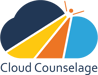

### Intern Name: Hursh Karnik
### Intern Id: 3564
### DOMAIN NAME: MACHINE LEARNING
### OBJECTIVE:To predict the Placement status of the students through ML models

##### importing required modules for data cleaning and data visualisation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [5]:
print(os.listdir())

['.ipynb_checkpoints', '01 Train Data.xlsx', '02 Test Data.xlsx', '1.txt', "Task2_Task 2_Student's_placement_prediction.ipynb"]


In [6]:
training_data = pd.read_excel('01 Train Data.xlsx')
training_data

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Saif ali,saifali@xyz.com,1,NaN,Data Visualization using Power BI,1.949319e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2021,9.0,3,2,NaN
4890,Lankesh,lankesh@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,NaN,NaN,Students,2021,7.2,4,3,NaN
4891,Sanjay,sanjay@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,wilson college,NaN,NaN,Students,2021,8.5,2,3,NaN
4892,Sushmita,sushmita@xyz.com,1,NaN,Data Visualization using Power BI,1.949330e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",NaN,NaN,Students,2021,6.5,5,5,NaN


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      4894 non-null   object 
 5   Attendee #                                                       4490 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

### data cleaning

##### droping group and price tier as all the column are empty 

In [10]:
columns = ['Price Tier', 'Group']
training_data = training_data.drop(columns, axis=1)

In [11]:
training_data.info()
# these two columns are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Ticket Type                                                      4894 non-null   object 
 4   Attendee #                                                       4490 non-null   float64
 5   Order Type                                                       4894 non-null   object 
 6   Currency                                                         4490 non-null   object 
 7   Total Paid                                

####  geting information about dublicate emails

In [13]:
duplicate_emails = training_data[training_data.duplicated(subset=['Email ID'], keep=False)]
print("Number of duplicate emails:", duplicate_emails['Email ID'].nunique())

Number of duplicate emails: 678


#### Removing All the Duplicates Data ByEmail

In [15]:
training_data = training_data.drop_duplicates(subset = 'Email ID',keep ='first')
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       1987 non-null   object 
 1   Email ID                                                         1987 non-null   object 
 2   Quantity                                                         1987 non-null   int64  
 3   Ticket Type                                                      1987 non-null   object 
 4   Attendee #                                                       1765 non-null   float64
 5   Order Type                                                       1987 non-null   object 
 6   Currency                                                         1765 non-null   object 
 7   Total Paid                                     

#### insight: 1987 rows left after removing duplicated emails
#### droping the columns that are not necessary in my machine learning model
##### Quantity
##### Attendee #
##### Order Type
##### Currency
##### Total Paid
##### Fees Paid
##### Eventbrite Fees
##### Eventbrite Payment Processing
##### Attendee Status

In [17]:
columns = ['Quantity','Attendee #','Order Type','Currency','Total Paid','Fees Paid','Eventbrite Fees','Eventbrite Payment Processing','Attendee Status']
training_data = training_data.drop(columns, axis=1)

In [18]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       1987 non-null   object 
 1   Email ID                                                         1987 non-null   object 
 2   Ticket Type                                                      1987 non-null   object 
 3   College Name                                                     1977 non-null   object 
 4   How did you come to know about this event?                       1222 non-null   object 
 5   Specify in "Others" (how did you come to know about this event)  47 non-null     object 
 6   Designation                                                      1987 non-null   object 
 7   Year of Graduation                             

##### droping column 4 and 5 also it is nothing related to train our machine learning model

In [20]:
training_data = training_data.drop('Specify in "Others" (how did you come to know about this event)', axis=1)
training_data = training_data.drop('How did you come to know about this event?', axis=1)

In [21]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   First Name          1987 non-null   object 
 1   Email ID            1987 non-null   object 
 2   Ticket Type         1987 non-null   object 
 3   College Name        1977 non-null   object 
 4   Designation         1987 non-null   object 
 5   Year of Graduation  280 non-null    object 
 6   CGPA                1987 non-null   float64
 7   Speaking Skills     1987 non-null   int64  
 8   ML Knowledge        1987 non-null   int64  
 9   Placement Status    666 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 170.8+ KB


 #### droping
First Name 
Email ID 
Ticket Type
Designation 
Year of Graduation
#### as these parameters are not necessary to count in our machine learning model

In [23]:
columns = ['First Name', 'Email ID', 'Ticket Type', 'Designation', 'Year of Graduation']
training_data= training_data.drop(columns,axis =1)


In [24]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      1977 non-null   object 
 1   CGPA              1987 non-null   float64
 2   Speaking Skills   1987 non-null   int64  
 3   ML Knowledge      1987 non-null   int64  
 4   Placement Status  666 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 93.1+ KB


### Data visualisation by paiplot to get a Rough idea about which ml model will me suitable for it 

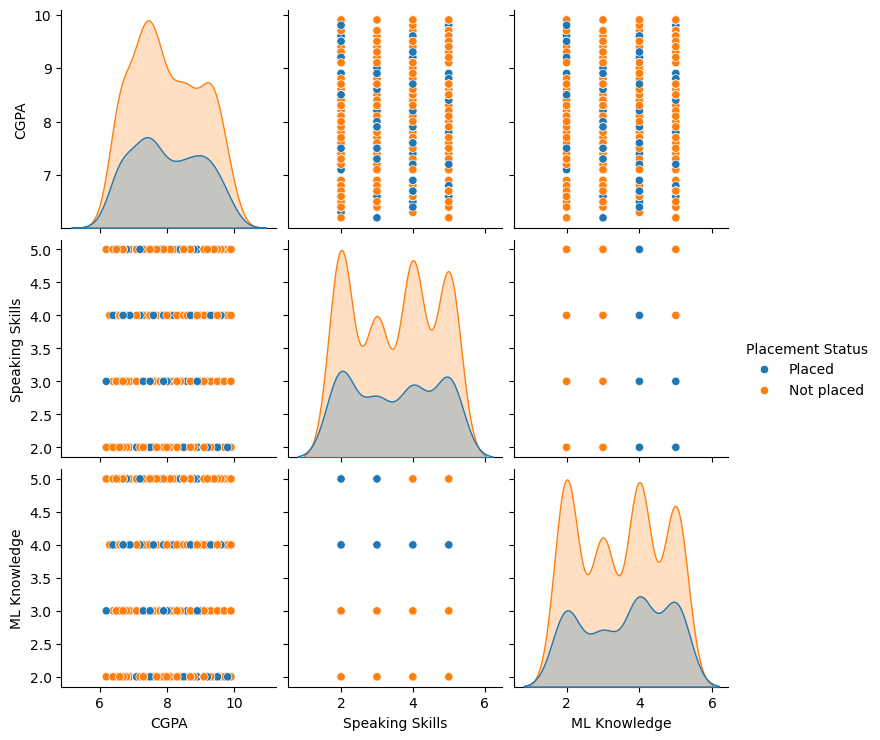

In [26]:
sns.pairplot(training_data,hue = 'Placement Status')

In [27]:
training_data['Placement Status'].value_counts()

Placement Status
Not placed    454
Placed        212
Name: count, dtype: int64

College Name
vidyalankar institute of technology, mumbai                                          94
priyadarshini college of engineering, nagpur                                         93
government polytechnic gandhinagar                                                   91
ld college of engineering, ahmedabad, gujarat                                        87
wilson college                                                                       82
b. k. birla college of arts, science & commerce (autonomous), kalyan                 78
g h raisoni institut of engineering and technology pune                              72
kle society's college of bca, rls institute, belagavi                                72
mit academy of engineering ,alandi                                                   71
dkte society's textile and engineering institute ichalkaranji                        64
vishwakarma institute of technology, pune                                            63
a. c. patil college

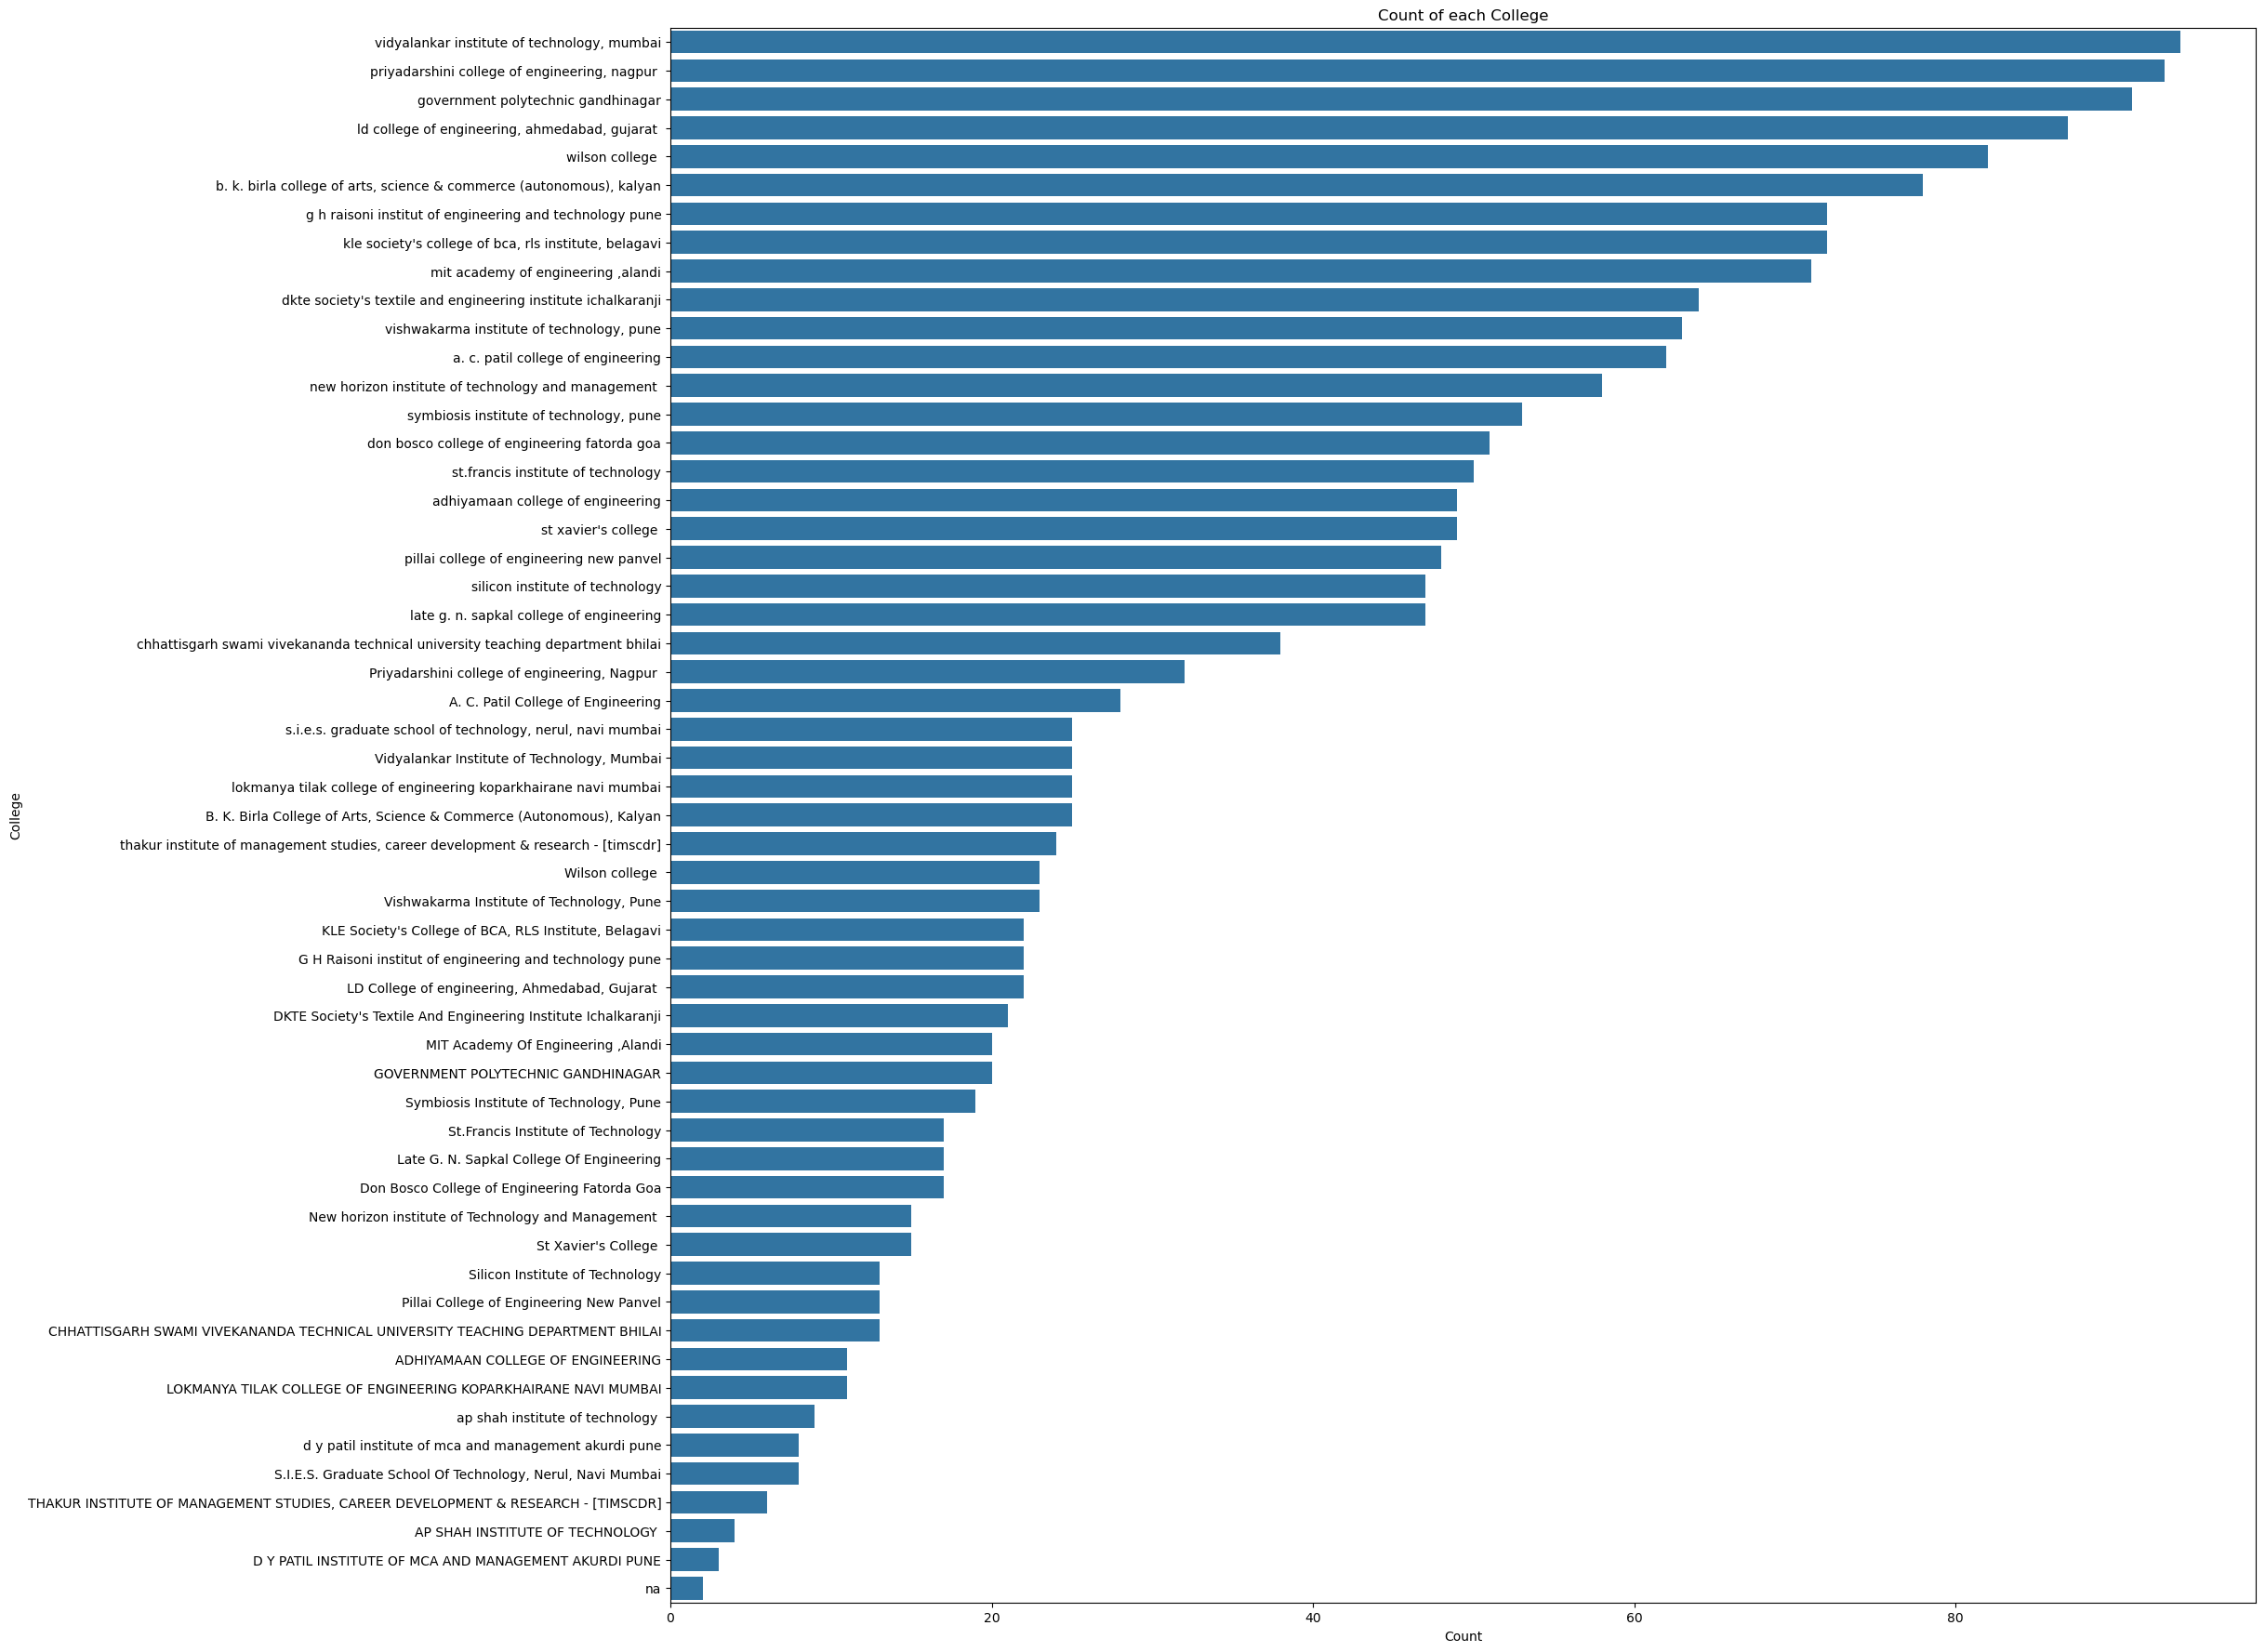

In [28]:
college_count = training_data['College Name'].value_counts()
print(college_count)
plt.figure(figsize=(22, 22))
plot = sns.barplot(x = college_count,y = college_count.index)
plt.xlabel('Count')
plt.ylabel('College')
plt.title('Count of each College')
plt.show()

In [29]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      1977 non-null   object 
 1   CGPA              1987 non-null   float64
 2   Speaking Skills   1987 non-null   int64  
 3   ML Knowledge      1987 non-null   int64  
 4   Placement Status  666 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 93.1+ KB


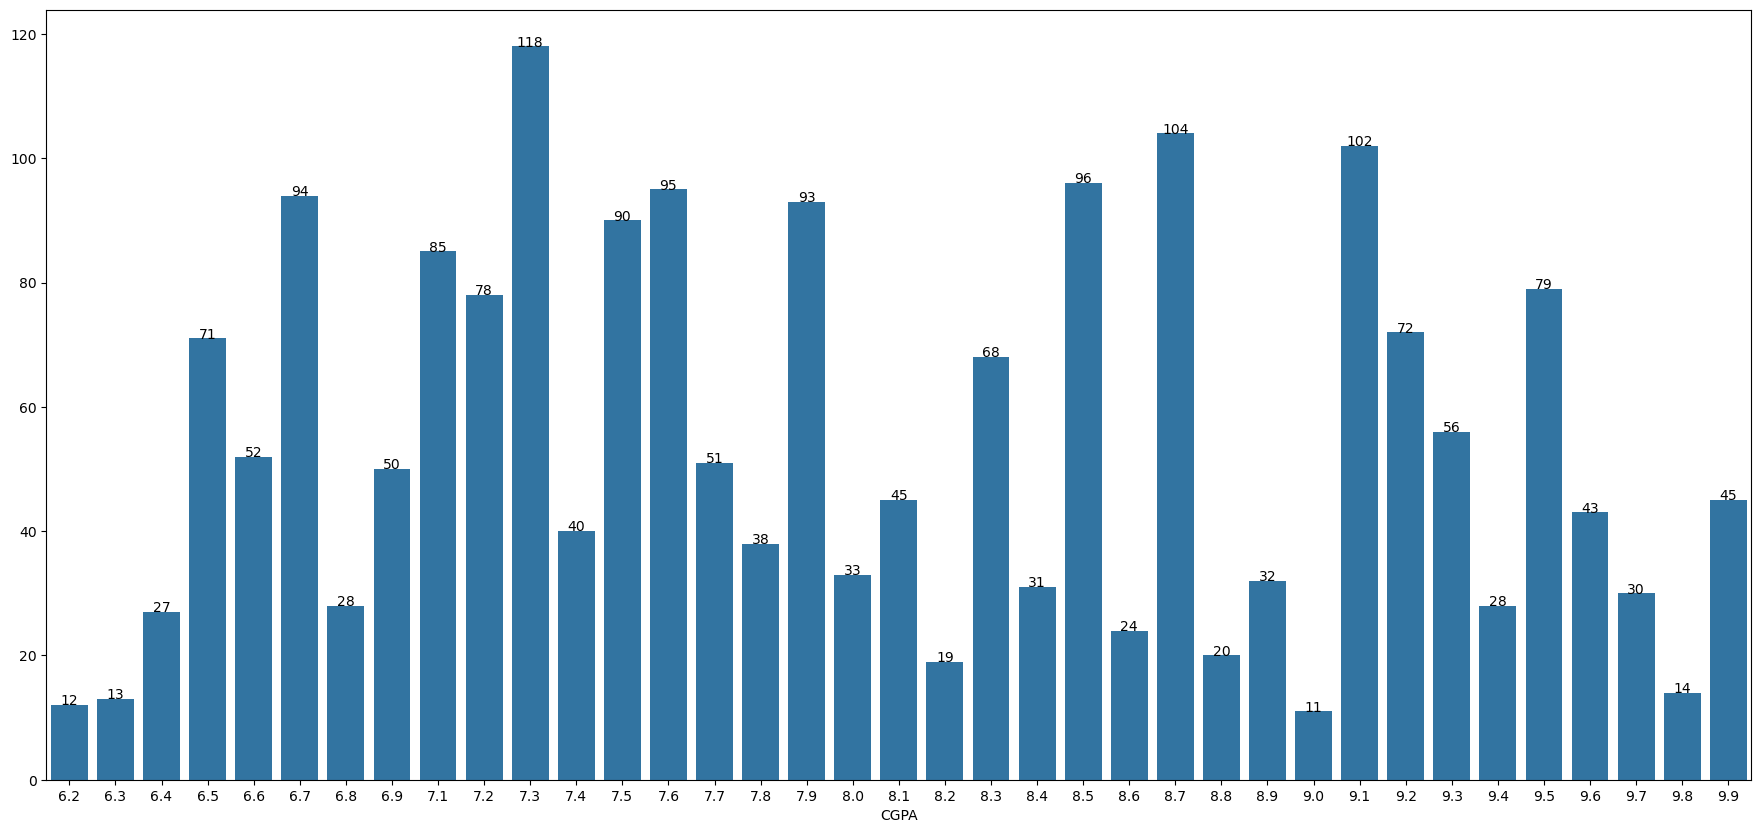

In [30]:
cgpa = training_data['CGPA'].value_counts().sort_index()
# print(cgpa)
plt.figure(figsize=(22, 10))
plot = sns.barplot(x= cgpa.index,y=cgpa.values)
for  index,value in enumerate(cgpa):
    plt.text(index,value,str(value),color='black',ha = "center")
    
plt.show()

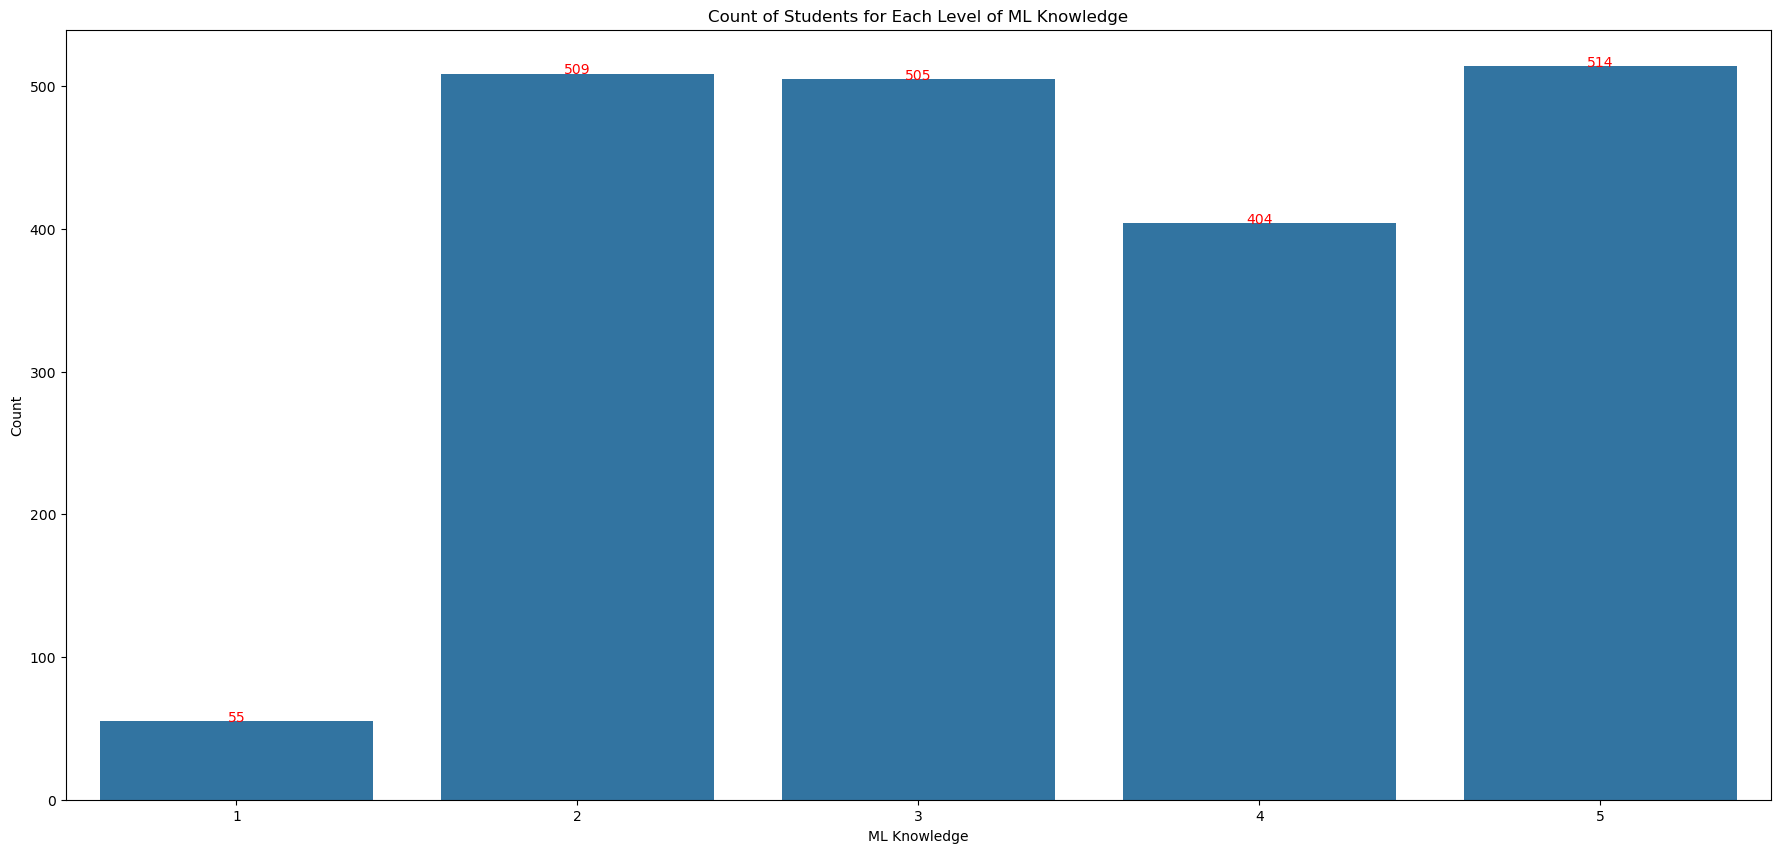

In [31]:
ml = training_data['ML Knowledge'].value_counts().sort_index()
# print(ml)
plt.figure(figsize=(22,10))
plot = sns.barplot(x=ml.index,y=ml.values)
for index, value in enumerate(ml):
    plt.text(index, value, str(value), color='red', ha='center')
plt.xlabel('ML Knowledge')
plt.ylabel('Count')
plt.title('Count of Students for Each Level of ML Knowledge')
plt.show()

Speaking Skills
1     55
2    522
3    503
4    392
5    515
Name: count, dtype: int64


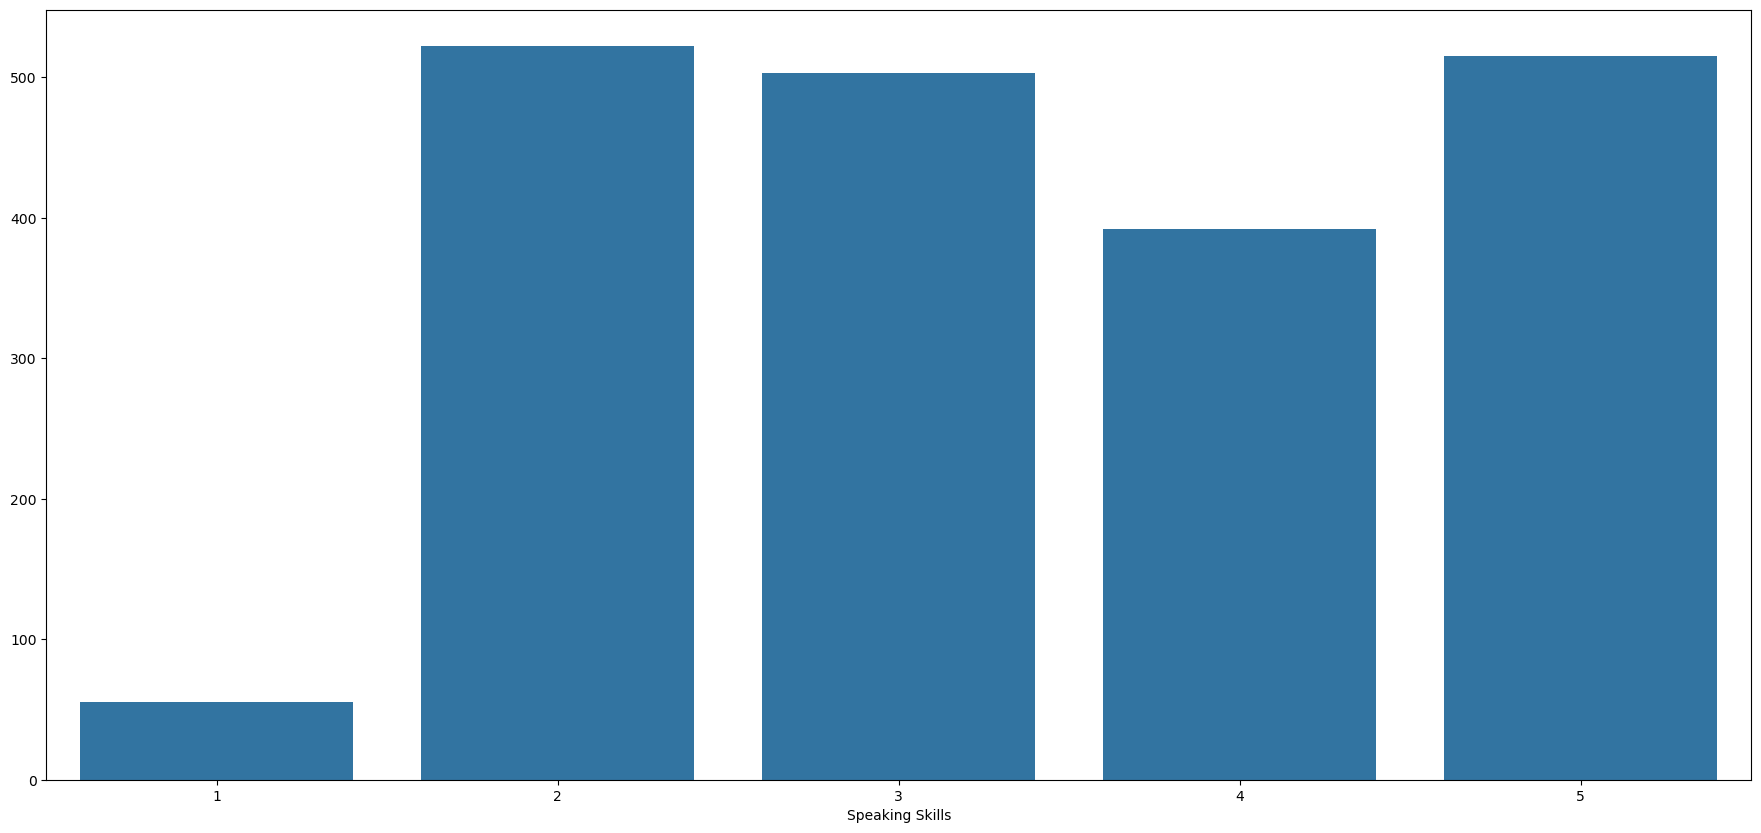

In [32]:
speak = training_data["Speaking Skills"].value_counts().sort_index()
print(speak)
plt.figure(figsize=(22,10))
plot = sns.barplot(x = speak.index,y = speak.values)
plt.show()

In [33]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      1977 non-null   object 
 1   CGPA              1987 non-null   float64
 2   Speaking Skills   1987 non-null   int64  
 3   ML Knowledge      1987 non-null   int64  
 4   Placement Status  666 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 93.1+ KB


### as we can see there are null status of placement so in training the ml model lets label the placed as 1 unplaced as 0 and null entries as 2

# Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
training_data['Placement Status'] = label_encoder.fit_transform(training_data['Placement Status'])
training_data['College Name'] = label_encoder.fit_transform(training_data['College Name'])
training_data['Placement Status'] = training_data['Placement Status'].fillna(0)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      1987 non-null   int32  
 1   CGPA              1987 non-null   float64
 2   Speaking Skills   1987 non-null   int64  
 3   ML Knowledge      1987 non-null   int64  
 4   Placement Status  1987 non-null   int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 77.6 KB


In [37]:
training_data.head(10)

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,5,6.7,2,5,1
1,2,8.2,3,2,0
2,7,6.5,4,3,0
3,16,8.7,2,5,0
4,20,9.1,3,5,1
5,24,8.9,4,3,0
6,18,7.4,2,4,0
7,8,7.3,4,3,0
8,9,8.6,4,2,0
9,3,9.2,3,4,0


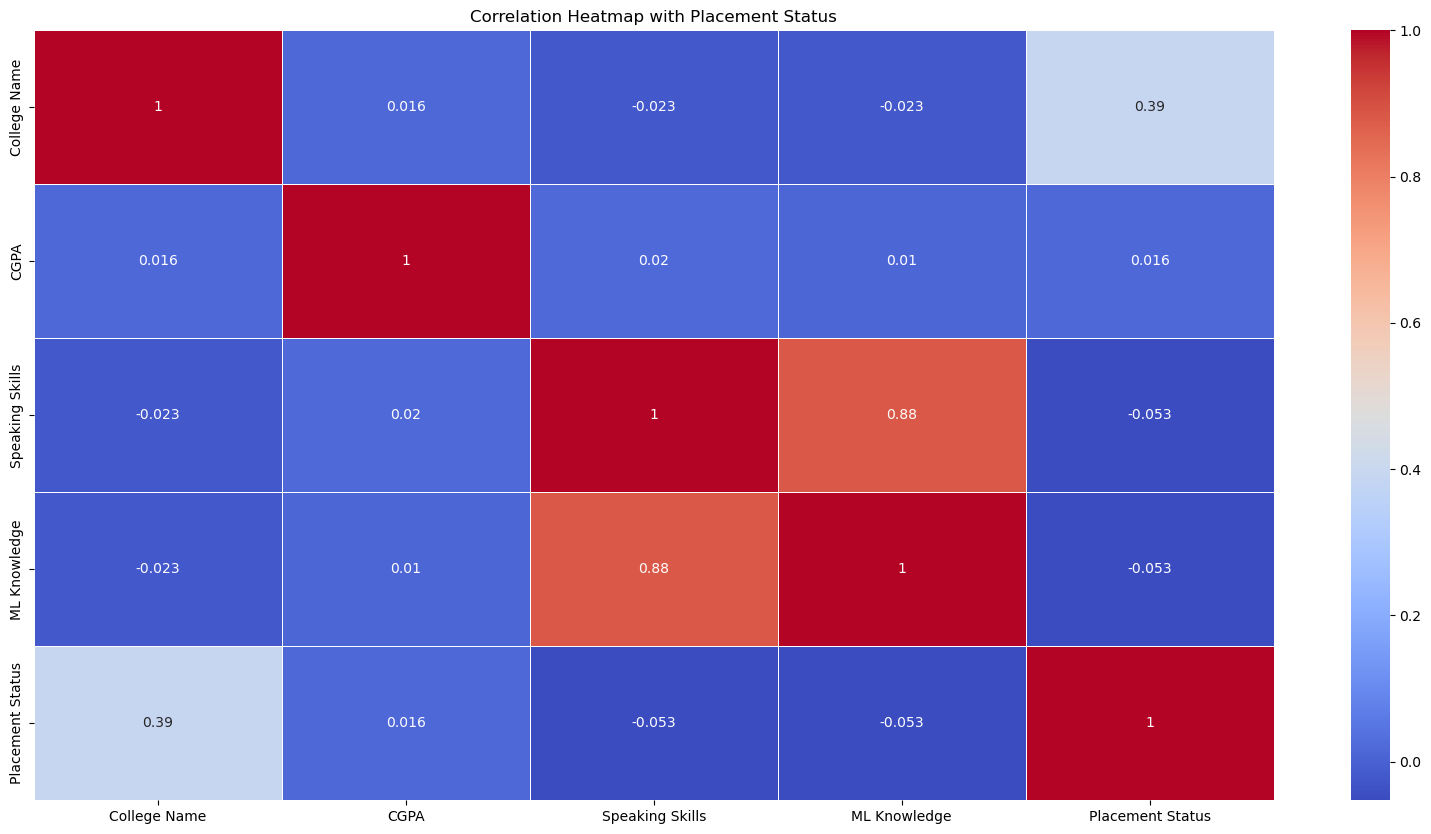

In [38]:
training_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(training_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Placement Status')
plt.show()

### so now our training data is cleaned and ready to train ml model so then we can clean the test data

In [40]:
test_df = pd.read_excel('02 Test Data.xlsx')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       3796 non-null   object 
 1   Email ID                                                         3796 non-null   object 
 2   Quantity                                                         3796 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      3796 non-null   object 
 5   Attendee #                                                       3794 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

### lets remove the duplicates by there email by keeping the first occuring email

In [42]:
duplicates = test_df[test_df.duplicated(subset='Email ID', keep=False)]
test_df_cleaned = test_df.drop_duplicates(subset='Email ID', keep='first')
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       2321 non-null   object 
 1   Email ID                                                         2321 non-null   object 
 2   Quantity                                                         2321 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      2321 non-null   object 
 5   Attendee #                                                       2321 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                     

### also removing the unnecessary columns like we did with the training data

In [44]:
columns = ['Quantity','Price Tier','Group','Attendee #','Order Type','Currency','Total Paid','Fees Paid','Eventbrite Fees','Eventbrite Payment Processing','Attendee Status']
test_df_cleaned = test_df_cleaned.drop(columns, axis=1)
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       2321 non-null   object 
 1   Email ID                                                         2321 non-null   object 
 2   Ticket Type                                                      2321 non-null   object 
 3   College Name                                                     2320 non-null   object 
 4   How did you come to know about this event?                       815 non-null    object 
 5   Specify in "Others" (how did you come to know about this event)  14 non-null     object 
 6   Designation                                                      2321 non-null   object 
 7   Year of Graduation                             

In [45]:
test_df_cleaned['Source of Event Information'] = test_df_cleaned['How did you come to know about this event?'] + ' ' + test_df_cleaned['Specify in "Others" (how did you come to know about this event)'].fillna('')
columns = ['How did you come to know about this event?','Specify in "Others" (how did you come to know about this event)']
test_df_cleaned = test_df_cleaned.drop(columns, axis=1)

test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   2321 non-null   object 
 1   Email ID                     2321 non-null   object 
 2   Ticket Type                  2321 non-null   object 
 3   College Name                 2320 non-null   object 
 4   Designation                  2321 non-null   object 
 5   Year of Graduation           489 non-null    object 
 6   CGPA                         2321 non-null   float64
 7   Speaking Skills              2321 non-null   int64  
 8   ML Knowledge                 2321 non-null   int64  
 9   Placement Status             0 non-null      float64
 10  Source of Event Information  815 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 217.6+ KB


In [46]:
columns = ['College Name','CGPA','Speaking Skills','ML Knowledge','Placement Status']
test_data = test_df_cleaned[columns]

# label encoding the college and other parameters also

In [48]:
test_data['College Name'] = label_encoder.fit_transform(test_data['College Name'])
test_data.head(6)

C:\Users\hursh\AppData\Local\Temp\ipykernel_21352\4187984623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['College Name'] = label_encoder.fit_transform(test_data['College Name'])


,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,49,7.8,3,3,NaN
1,41,9.1,3,3,NaN
2,27,6.9,2,2,NaN
3,53,8.4,4,4,NaN
4,39,6.7,5,5,NaN
5,33,9.2,2,2,NaN


# training ML model 

In [50]:
columns = ['College Name','CGPA','Speaking Skills', 'ML Knowledge']
x = training_data[columns]
y = training_data['Placement Status']

# 1 training ml model with  Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size =0.2)

In [53]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predict1 = model1.predict(x_test)
print("Accuracy:",accuracy_score(y_test, predict1))
print("Classification Report:\n", classification_report(y_test, predict1))

Accuracy: 0.7035175879396985
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.27      0.35        98
           1       0.20      0.03      0.05        34
           2       0.74      0.95      0.83       266

    accuracy                           0.70       398
   macro avg       0.49      0.42      0.41       398
weighted avg       0.64      0.70      0.65       398



# 2 training ml model with Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [57]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
predict2 = model2.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict2))
print("Classification Report:\n", classification_report(y_test, predict2))

Accuracy: 0.535175879396985
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.29      0.28        98
           1       0.10      0.15      0.12        34
           2       0.72      0.68      0.70       266

    accuracy                           0.54       398
   macro avg       0.37      0.37      0.37       398
weighted avg       0.56      0.54      0.55       398



# 3 training ml model with Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100,random_state=42)
model3.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
predict3 = model3.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict3))
print("Classification Report:\n", classification_report(y_test, predict3))

Accuracy: 0.6381909547738693
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        98
           1       0.12      0.12      0.12        34
           2       0.76      0.83      0.79       266

    accuracy                           0.64       398
   macro avg       0.42      0.41      0.41       398
weighted avg       0.61      0.64      0.62       398



# 4 traing ml model with Support Vector Machines (SVM)

In [63]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(x_train, y_train)

SVC()

In [64]:
predict4 = model4.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict4))
print("Classification Report:\n", classification_report(y_test, predict4))

Accuracy: 0.7135678391959799
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.34      0.42        98
           1       0.00      0.00      0.00        34
           2       0.74      0.94      0.83       266

    accuracy                           0.71       398
   macro avg       0.43      0.43      0.42       398
weighted avg       0.63      0.71      0.66       398



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5 training ml model using k-Nearest Neighbors (k-NN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model5  = KNeighborsClassifier()
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
predict5 = model5.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict5))
print("Classification Report:\n", classification_report(y_test, predict5))

Accuracy: 0.6934673366834171
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.40      0.44        98
           1       0.18      0.12      0.14        34
           2       0.79      0.88      0.83       266

    accuracy                           0.69       398
   macro avg       0.48      0.46      0.47       398
weighted avg       0.66      0.69      0.67       398



# 6 training ml model with Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train, y_train)

GaussianNB()

In [70]:
predict6 = model6.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict6))
print("Classification Report:\n", classification_report(y_test, predict6))

Accuracy: 0.7060301507537688
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.33      0.40        98
           1       0.00      0.00      0.00        34
           2       0.74      0.94      0.83       266

    accuracy                           0.71       398
   macro avg       0.42      0.42      0.41       398
weighted avg       0.62      0.71      0.65       398



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 7 training ml model with MLP Classifier

In [72]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(max_iter=300, random_state=0)
model7.fit(x_train, y_train)


MLPClassifier(max_iter=300, random_state=0)

In [73]:
predict7 = model7.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict7))
print("Classification Report:\n", classification_report(y_test, predict7))

Accuracy: 0.7110552763819096
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.36      0.42        98
           1       0.00      0.00      0.00        34
           2       0.75      0.93      0.83       266

    accuracy                           0.71       398
   macro avg       0.42      0.43      0.42       398
weighted avg       0.63      0.71      0.66       398



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 8 training ml model with GradientBoostingClassifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
model8 = GradientBoostingClassifier(n_estimators=100, random_state=0)
model8.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [76]:
predict8 = model8.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict8))
print("Classification Report:\n", classification_report(y_test, predict8))

Accuracy: 0.7236180904522613
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.38      0.46        98
           1       0.25      0.15      0.19        34
           2       0.78      0.92      0.85       266

    accuracy                           0.72       398
   macro avg       0.54      0.48      0.50       398
weighted avg       0.69      0.72      0.70       398



# 9 training ml model using ExtraTreesClassifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model9 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model9.fit(x_train, y_train)

ExtraTreesClassifier(random_state=0)

In [79]:
predict9 = model9.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict9))
print("Classification Report:\n", classification_report(y_test, predict9))

Accuracy: 0.6180904522613065
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.30      0.33        98
           1       0.16      0.18      0.17        34
           2       0.74      0.79      0.77       266

    accuracy                           0.62       398
   macro avg       0.43      0.42      0.42       398
weighted avg       0.60      0.62      0.61       398



# 10 training ml model with Ridge

In [81]:
from sklearn.linear_model import Ridge
model10 = Ridge()
model10.fit(x_train, y_train)

Ridge()

In [82]:
predict10 = model10.predict(x_test)
mse = mean_squared_error(y_test, predict10)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test,predict10)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 0.6398031727228385
Root Mean Squared Error: 0.799876973492073
R-squared: 0.1311691433030272


 # 11 traing ml model with AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
model11 = AdaBoostClassifier(n_estimators=100, random_state=0)
model11.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

In [85]:
predict11 = model11.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict11))
print("Classification Report:\n", classification_report(y_test, predict11))

Accuracy: 0.7336683417085427
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.44      0.50        98
           1       0.21      0.09      0.12        34
           2       0.79      0.92      0.85       266

    accuracy                           0.73       398
   macro avg       0.53      0.48      0.49       398
weighted avg       0.69      0.73      0.70       398



# after training all the suitable model ,use the most accurate model to fit the test_data and predict the placement status

In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      2321 non-null   int32  
 1   CGPA              2321 non-null   float64
 2   Speaking Skills   2321 non-null   int64  
 3   ML Knowledge      2321 non-null   int64  
 4   Placement Status  0 non-null      float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 99.7 KB


In [88]:
test_pred_para = test_data.drop(columns="Placement Status")

predicted_placement = model11.predict(test_pred_para)

In [89]:
test_data['Placement Status Predicted'] = predicted_placement

C:\Users\hursh\AppData\Local\Temp\ipykernel_21352\4103514898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Placement Status Predicted'] = predicted_placement


In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   College Name                2321 non-null   int32  
 1   CGPA                        2321 non-null   float64
 2   Speaking Skills             2321 non-null   int64  
 3   ML Knowledge                2321 non-null   int64  
 4   Placement Status            0 non-null      float64
 5   Placement Status Predicted  2321 non-null   int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 108.8 KB


In [91]:
test_df_cleaned['Predicted Placement Status']  = predicted_placement

In [92]:
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   2321 non-null   object 
 1   Email ID                     2321 non-null   object 
 2   Ticket Type                  2321 non-null   object 
 3   College Name                 2320 non-null   object 
 4   Designation                  2321 non-null   object 
 5   Year of Graduation           489 non-null    object 
 6   CGPA                         2321 non-null   float64
 7   Speaking Skills              2321 non-null   int64  
 8   ML Knowledge                 2321 non-null   int64  
 9   Placement Status             0 non-null      float64
 10  Source of Event Information  815 non-null    object 
 11  Predicted Placement Status   2321 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 226.7+ KB


# lets now decode the label again 
####   0 'Not Placed',
####  1 'Placed',
####  2 ' '

In [94]:
dict = {
    0: 'Not Placed',
    1: 'Placed',
    2: ' '
}
test_df_cleaned['Predicted Placement Status'] = test_df_cleaned['Predicted Placement Status'].replace(dict)

In [95]:
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   2321 non-null   object 
 1   Email ID                     2321 non-null   object 
 2   Ticket Type                  2321 non-null   object 
 3   College Name                 2320 non-null   object 
 4   Designation                  2321 non-null   object 
 5   Year of Graduation           489 non-null    object 
 6   CGPA                         2321 non-null   float64
 7   Speaking Skills              2321 non-null   int64  
 8   ML Knowledge                 2321 non-null   int64  
 9   Placement Status             0 non-null      float64
 10  Source of Event Information  815 non-null    object 
 11  Predicted Placement Status   2321 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 235.7+ KB


In [96]:
columns = ['First Name','Email ID','Ticket Type','College Name', 'Designation','Year of Graduation', 'CGPA','Speaking Skills','ML Knowledge','Predicted Placement Status','Source of Event Information']
final_predicted_data = test_df_cleaned [columns]

In [97]:
final_predicted_data.head(15)

,First Name,Email ID,Ticket Type,College Name,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Predicted Placement Status,Source of Event Information
0,Sahil,sahil@xyz.com,Hello ML and DL,"symbiosis institute of technology, pune",Students,NaN,7.8,3,3,,Whatsapp
1,Amrita,amrita@xyz.com,Hello ML and DL,"mit academy of engineering ,alandi",Students,NaN,9.1,3,3,,Whatsapp
2,Mamta,mamta@xyz.com,Hello ML and DL,a. c. patil college of engineering,Students,NaN,6.9,2,2,,Whatsapp
3,Bhagyashri,bhagyashri@xyz.com,Hello ML and DL,wilson college,Students,NaN,8.4,4,4,,Others
4,Divyanshu,divyanshu@xyz.com,Hello ML and DL,"ld college of engineering, ahmedabad, gujarat",Students,NaN,6.7,5,5,,Whatsapp
5,Aditya,aditya@xyz.com,Hello ML and DL,dkte society's textile and engineering institu...,Students,NaN,9.2,2,2,,Email
6,Akshay,akshay@xyz.com,Hello ML and DL,"thakur institute of management studies, career...",Students,NaN,7.3,2,2,,Whatsapp
7,Vaishnavi,vaishnavi@xyz.com,Hello ML and DL,lokmanya tilak college of engineering koparkha...,Students,NaN,7.9,2,2,,Whatsapp
8,Pranita,pranita@xyz.com,Hello ML and DL,"priyadarshini college of engineering, nagpur",Students,NaN,9.9,5,5,,Whatsapp
9,Pratik,pratik@xyz.com,Hello ML and DL,"vidyalankar institute of technology, mumbai",Students,NaN,7.6,2,2,,Whatsapp


In [98]:
final_predicted_data.to_excel('Final Placement Predicted Data.xlsx')
final_predicted_data.to_csv('Final Placement Predicted Data.csv')